In [1]:
#Подключаем библиотеки

#Для работы с данными
import pandas as pd
import numpy as np

#Для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

#Делаем графики вида seaborm
sns.set()

# 1. Промежуточные функции

In [2]:
def get_BoxPlot(x,y,df,means=True,hue=None):
    '''
    Вывод графиков Box-Plot для параметра Y по группам X.
    Вход:
    * x - название столбца в DataFrame, по которому группируются данные;
    * y - название столбца в DataFrame, по которому строятся Box-Plot;
    * df - DataFrame;
    * means - показывать ли среднее по выборке;
    * hue - название столбца в DataFrame, по которому дополнительно разбиваются данные.
    Выход:
    * None.
    '''
    #Место для Box-Plot и его настройки
    fig, ax = plt.subplots(figsize = (15, 5))
    #Box-Plot
    sns.boxplot(x=x, y=y, data=df, ax=ax, showmeans=means, hue=hue)
    #Разворот подписи по оси X
    plt.xticks(rotation=90)
    #Описание над графиком
    ax.set_title('Boxplot for ' + y)
    #Обновление графика
    plt.show()
    pass

def get_LinePlot(x,y,df,hue,markers=True):
    '''
    Вывод графиков Box-Plot для параметра Y по группам X.
    Вход:
    * x - название столбца в DataFrame, по которому группируются данные;
    * y - название столбца в DataFrame, по которому строятся Box-Plot;
    * df - DataFrame;
    * markers - показывать ли маркеры;
    * hue - название столбца в DataFrame, по которому дополнительно разбиваются данные.
    Выход:
    * None.
    '''
    #Место для Line-Plot и его настройки
    fig, ax = plt.subplots(figsize = (15, 5))
    #Line-Plot
    sns.lineplot(data=df, x=x, y=y, hue=hue, style=hue, markers=True)
    #Разворот подписи по оси X
    plt.xticks(rotation=90)
    #Описание над графиком
    ax.set_title('LinePlot for ' + y)
    #Обновление графика
    plt.show()
    pass

def get_Heatmap(df,cols):
    '''
    Построение тепловой карты по матрице корреляций.
    Вход:
    * df - DataFrame;
    * cols - столбцы в DataFrame, по которым считаются корреляции.
    Выход:
    * None.
    '''
    #Таблица корреляций
    table_corr = df[cols].corr().round(2)
    #Место для Line-Plot и его настройки
    fig, ax = plt.subplots(figsize = (20, 20))
    #Heat-Map
    sns.heatmap(table_corr, vmin=-1, vmax=1, cmap="YlGnBu",annot=True)
    #Описание над графиком
    ax.set_title('HeatMap')
    #Обновление графика
    plt.show()
    pass

# 2. Чтение и осмотр данных

***Загружаем данные с таблицы SQL, по заданию, что было выполнено в проекте 4.***

In [3]:
#Чтение данных
df = pd.read_csv('Data_flights.csv')
#Копирование
df_init = df.copy()

***Проверяем, правильно ли все считалось.***

In [4]:
#Осмотр данных
df.head(2)

,id_flight,no_flight,date_dep_0,date_arr_0,time_0,dep_delay,arr_delay,id_airport_dep,airport_name_dep,city_dep,...,sum_amount,sum_amount_booking_business,sum_amount_air_business,sum_amount_booking_economy,sum_amount_air_economy,mileage,avg_velocity_0,price_fuel_0,profit_flight,isprofit
0,136514,PG0194,2017-02-07T06:10:00Z,2017-02-07T11:15:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,0 years 0 mons 0 days 0 hours 4 mins 0.00 secs,0 years 0 mons 0 days 0 hours -2 mins -0.00 secs,AAQ,Anapa Vityazevo Airport,Anapa,...,NaN,NaN,NaN,NaN,NaN,3635.04199,198.636174,517624.65,NaN,NaN
1,136567,PG0194,2017-02-14T06:10:00Z,2017-02-14T11:15:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,0 years 0 mons 0 days 0 hours 2 mins 0.00 secs,0 years 0 mons 0 days 0 hours 8 mins 0.00 secs,AAQ,Anapa Vityazevo Airport,Anapa,...,NaN,NaN,NaN,NaN,NaN,3635.04199,198.636174,517624.65,NaN,NaN


In [5]:
#Проверка на пропущенные значения и типы столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_flight                    127 non-null    int64  
 1   no_flight                    127 non-null    object 
 2   date_dep_0                   127 non-null    object 
 3   date_arr_0                   127 non-null    object 
 4   time_0                       127 non-null    object 
 5   dep_delay                    127 non-null    object 
 6   arr_delay                    127 non-null    object 
 7   id_airport_dep               127 non-null    object 
 8   airport_name_dep             127 non-null    object 
 9   city_dep                     127 non-null    object 
 10  timezone_dep                 127 non-null    object 
 11  id_airport_arr               127 non-null    object 
 12  airport_name_arr             127 non-null    object 
 13  city_arr            

***Есть пропущенные значения, признаки различных типов.***

In [6]:
#Список всех столбцов
df.columns

Index(['id_flight', 'no_flight', 'date_dep_0', 'date_arr_0', 'time_0',
       'dep_delay', 'arr_delay', 'id_airport_dep', 'airport_name_dep',
       'city_dep', 'timezone_dep', 'id_airport_arr', 'airport_name_arr',
       'city_arr', 'timezone_arr', 'id_aircraft', 'airc_full_seats',
       'airc_full_seats_business', 'airc_full_seats_economy',
       'count_passenger', 'count_passenger_business',
       'count_passenger_economy', 'occupancy', 'occupancy_business',
       'occupancy_economy', 'sum_amount_booking', 'sum_amount_air',
       'sum_amount', 'sum_amount_booking_business', 'sum_amount_air_business',
       'sum_amount_booking_economy', 'sum_amount_air_economy', 'mileage',
       'avg_velocity_0', 'price_fuel_0', 'profit_flight', 'isprofit'],
      dtype='object')

# 3. Обработка данных

***Обработаем каждый столбец по отдельности для проведения EDA.***

## 3.1) no_flight

In [7]:
#Уникальные значения
df['no_flight'].unique()

array(['PG0194', 'PG0252', 'PG0480'], dtype=object)

***Как показал предварительный анализ в SQL, по авиарейсам с номером 0194 нету никакой информации по билетам, поэтому нет смысла включать их в дальнейший анализ. Проверим, действительно ли это так.***

In [8]:
#Проверка рейса 'PG0194' на пропущенные значения
df_sub = df[df['no_flight'] == 'PG0194']
df_sub.isna().sum()

id_flight                      0
no_flight                      0
date_dep_0                     0
date_arr_0                     0
time_0                         0
dep_delay                      0
arr_delay                      0
id_airport_dep                 0
airport_name_dep               0
city_dep                       0
timezone_dep                   0
id_airport_arr                 0
airport_name_arr               0
city_arr                       0
timezone_arr                   0
id_aircraft                    0
airc_full_seats                0
airc_full_seats_business       0
airc_full_seats_economy        0
count_passenger                9
count_passenger_business       9
count_passenger_economy        9
occupancy                      9
occupancy_business             9
occupancy_economy              9
sum_amount_booking             9
sum_amount_air                 9
sum_amount                     9
sum_amount_booking_business    9
sum_amount_air_business        9
sum_amount

***Действительно, все рейсы с пропущенными значениями в исходной таблице относятся к данному номеру рейса.***

In [9]:
#Удаление данных
df.dropna(inplace=True)

## 3.2) Date

In [10]:
#Осмотр данных
df[['date_dep_0','date_arr_0','time_0','dep_delay', 'arr_delay']].head(2)

,date_dep_0,date_arr_0,time_0,dep_delay,arr_delay
9,2017-02-20T10:05:00Z,2017-02-20T11:45:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,0 years 0 mons 0 days 0 hours 1 mins 0.00 secs,0 years 0 mons 0 days 0 hours 1 mins 0.00 secs
10,2017-01-12T10:05:00Z,2017-01-12T11:45:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,0 years 0 mons 0 days 0 hours 2 mins 0.00 secs,0 years 0 mons 0 days 0 hours 2 mins 0.00 secs


***Столбцы с датами имеют тип str. Переведем их в тип date.***

In [11]:
#Преобразование столбцов 'date_dep_0' и 'date_arr_0'
df['date_dep_0'] = df['date_dep_0'].apply(lambda x: pd.Timestamp(x))
df['date_arr_0'] = df['date_arr_0'].apply(lambda x: pd.Timestamp(x))

In [12]:
#Преобразование столбца 'time_0', 'dep_delay' и 'arr_delay'
df['time_0'] = df['date_arr_0'] - df['date_dep_0']

In [13]:
#Промежуточная функция
def get_delay(x):
    '''
    Перевод str в количество минут (опоздания)
    Вход:
    * x - строка формата '%Y years %m mons %d days %H hours %M mins %S secs'
    Выход:
    * int - количество минут.
    '''
    #Извлечение индексов
    ind_H = x.find('days') + 5
    ind_M = x.find('hours') + 6
    ind_S = x.find('mins') - 1
    #Извлечение часов и минут
    #Секунды не извелекаются, они всегда '0.00'
    H = int(x[ind_H:ind_M-7])
    M = int(x[ind_M:ind_S])
    return H * 60 + M
#Преобразование столбцов 'dep_delay' и 'arr_delay'
df['dep_delay_min'] = df['dep_delay'].apply(lambda x: get_delay(x))
df['arr_delay_min'] = df['arr_delay'].apply(lambda x: get_delay(x))

In [14]:
#Преобразуем
df['date_dep'] = df['date_dep_0'].dt.date
df['date_arr'] = df['date_arr_0'].dt.date
#Создаем новый признак: день недели
df['day_of_week'] = df['date_dep_0'].dt.dayofweek
#Создаем новый признак: месяц
df['month'] = df['date_dep_0'].dt.month

In [15]:
#Замена значений
dict_month = {1: 'Jan', 2: 'Feb', 12: 'Dec'}
dict_day = {0: 'Mon', 1: 'Thue', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['month'] = df['month'].replace(dict_month)
df['day_of_week'] = df['day_of_week'].replace(dict_day)

In [16]:
#Количество рейсов по месяцам
df.groupby('month')['id_flight'].agg('count')

month
Feb    56
Jan    62
Name: id_flight, dtype: int64

In [17]:
#Количество рейсов по дням недели
df.groupby(['no_flight','day_of_week'])['id_flight'].agg('count')

no_flight  day_of_week
PG0252     Fri            8
           Mon            9
           Sat            8
           Sun            9
           Thue           9
           Thur           8
           Wed            8
PG0480     Fri            8
           Mon            9
           Sat            8
           Sun            9
           Thue           9
           Thur           8
           Wed            8
Name: id_flight, dtype: int64

## 3.3) Airport Dep/Arr

***Аэропорт отбытия всегда один и тот же, поэтому данный признак никак не меняется по прецендентам. Аэропорт прибытия и его параметры могут быть различны, но значения меняются аналогично признаку no_flights. Не имеет смысла держать их все вместе.***

In [18]:
#Удаляем столбцы
df.drop(columns=['id_airport_dep','airport_name_dep','city_dep','timezone_dep'],inplace=True)
#Удаляем столбцы
df.drop(columns=['id_airport_arr','airport_name_arr','city_arr','timezone_arr'],inplace=True)

## 3.4) Aircraft

In [19]:
#Уникальные значения
df['id_aircraft'].unique()

array(['733', 'SU9'], dtype=object)

***Летает всего два типа самолета, проверим может ли один и тот же самолет летать по различным номерам рейсов.***

In [20]:
#Сгруппируем и проверим
df.groupby('id_aircraft')['no_flight'].agg(lambda x: x.unique())

id_aircraft
733    PG0252
SU9    PG0480
Name: no_flight, dtype: object

***Нет, не может. Значит, аналогично параметрам самолета - удаляем их.***

In [21]:
#Удаляем столбцы
df.drop(columns=['id_aircraft'],inplace=True)

## 3.5) Посчитаем заново траты (точный расчет)

***В SQL формула была приблизительная, попытаемся ее уточнить.***

In [22]:
#Удаляем столбцы
df.drop(columns=['price_fuel_0','profit_flight','isprofit'],inplace=True)

In [23]:
#Удельный расход топлива (кг/(чел*км))
#Источник 733: https://www.airlines-inform.ru/commercial-aircraft/boeing-737-300.html
#Источник SU9: https://www.airlines-inform.ru/commercial-aircraft/superjet-100.html
G = {'PG0252': 13000 / (149 * 2900), 'PG0480': 12690 / (95 * 4420)}
df['G_fuel'] = df['no_flight'].replace(G)

In [24]:
#Максимальная емкость топлива (л3)
max(df['G_fuel'] * df['count_passenger'] * df['mileage'] / 715 * 1000)

6674.723389635628

In [25]:
#Цены на топливо (руб/кг)
#Источник: https://favt.gov.ru/dejatelnost-ajeroporty-i-ajerodromy-ceny-na-aviagsm/?id=7329
price_fuel = {1: 40.686, 2:37.714, 12:45.281}
df['price_fuel'] = df['date_dep_0'].dt.month.replace(price_fuel)
#Учет НДС - 18%
#Источник: https://www.dme.ru/files/doc/e0jgn4om.ht5.pdf
df['price_fuel'] = 1.18 * df['price_fuel']

In [26]:
#Учет прочих трат (руб/кг)
#С учетом НДС
#Источник: https://www.dme.ru/files/doc/e0jgn4om.ht5.pdf
#ВАЖНО: это цены для Домодедово
df['other_price'] = 1.32                                  #Обеспечение заправки авиационным топливом
df['other_price'] = df['other_price'] + 1.045             #Хранение авиационного топлива
df['other_price'] = df['other_price'] + 0.260             #Сбор за взлет/посадку
df['other_price'] = df['other_price'] + 0.260 * 0.05 * 2  #Предоставоление сверхнормативной стоянки (2 - часы стоянки)
df['other_price'] = df['other_price'] + 0.203             #Сбор за авиационную безопасность

In [27]:
#Учет прочих трат (руб/чел)
#С учетом НДС
#Источник: https://www.dme.ru/files/doc/e0jgn4om.ht5.pdf
#ВАЖНО: это цены для Домодедово
df['pass_price'] = 75                                     #Сбор за предоставление аэровокзального комплекса на внутренних линиях
df['pass_price'] = df['pass_price'] +  234                #Сбор за обслуживание пассажиров на внутренних линиях

In [28]:
#Суммарные расходы
n_fuel = 1.5 #Коэффициент запаса по топливу
df['consumption'] = (n_fuel * df['price_fuel'] + df['other_price']) * df['G_fuel'] * df['count_passenger'] * df['mileage'] +\
                    df['pass_price'] * df['count_passenger']

In [29]:
#Прибыль
df['profit'] = df['sum_amount_air'] - df['consumption']

In [30]:
#Удаление столбцов
df.drop(columns=['G_fuel','pass_price','other_price','price_fuel'],inplace=True)

## 3.6) Прочее

***Удаляем столбцы, которые точно в дальнейшем не понадобятся. Также столбцы оставшиеся в процессе Feature engineering.***

In [31]:
#Удаляем столбцы
df.drop(columns=['avg_velocity_0','time_0','airc_full_seats','airc_full_seats_business','airc_full_seats_economy',
                'count_passenger','count_passenger_business','count_passenger_economy'],inplace=True)

***Время полета, средняя скорость и количество мест аналогичны номеру рейса no_flight. Число пассажиров не так информативно будет в дальнейшем, как заполняемость рейса.***

In [32]:
#Удаляем столбцы
df.drop(columns=['dep_delay','arr_delay','date_dep_0','date_arr_0'],inplace=True)

# 3. Проверка на выбросы

***Не проводится, так как мало прецендентов.***

# 4. EDA

In [33]:
#Выделяем столбцы с количественными признаками
cols = df.select_dtypes(include=['float64', 'int64']).columns
#Убираем лишние столбцы
cols = cols.drop(['id_flight','mileage','dep_delay_min','arr_delay_min'])

## 4.1) Table_corr

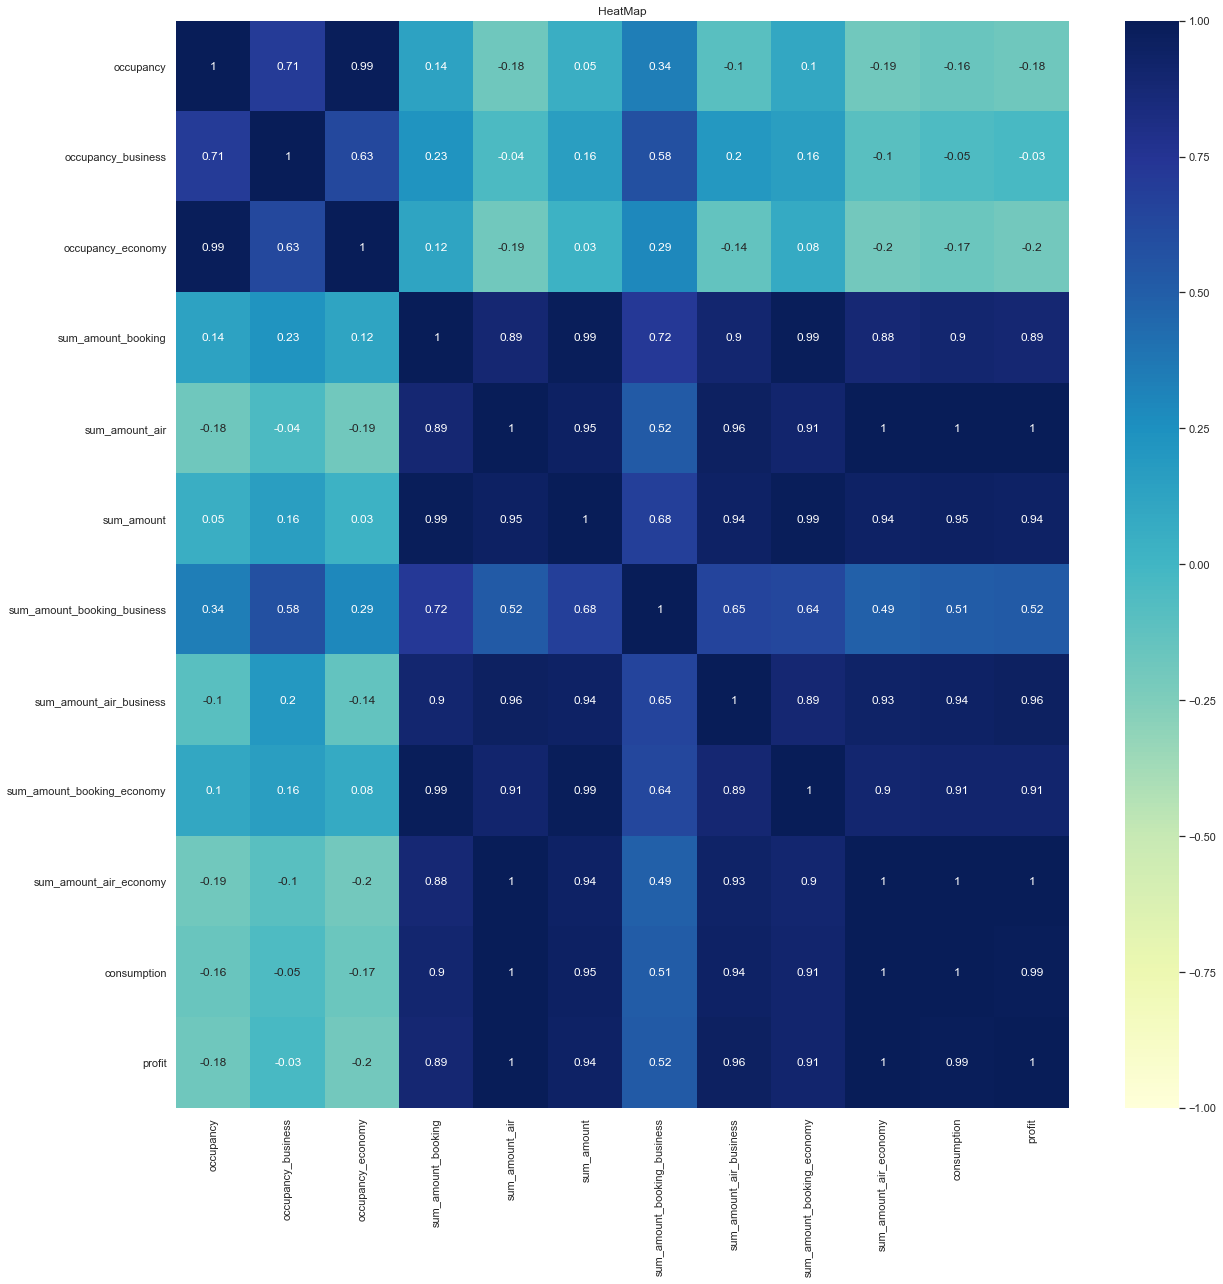

In [34]:
#Тепловая карта
get_Heatmap(df,cols)

***Очень много параметров коррелируют между собой, нет смысла описывать их все в дальнейшем. Уберем часть из них.***

In [35]:
#Удаляем столбцы
list_drop_cols = ['occupancy_business','occupancy_economy','sum_amount',
                  'sum_amount_booking_business','sum_amount_booking_economy',
                  'sum_amount_air_economy','sum_amount_air_business', 'consumption']
df.drop(columns=list_drop_cols,inplace=True)
cols = cols.drop(list_drop_cols)
#

***Параметры 'sum_amount_air' и 'sum_amount_booking' не исключаются (хотя имеют высокую корреляцию с другими), чтобы провести над ними дополнительные выводы в дальнейшем.***

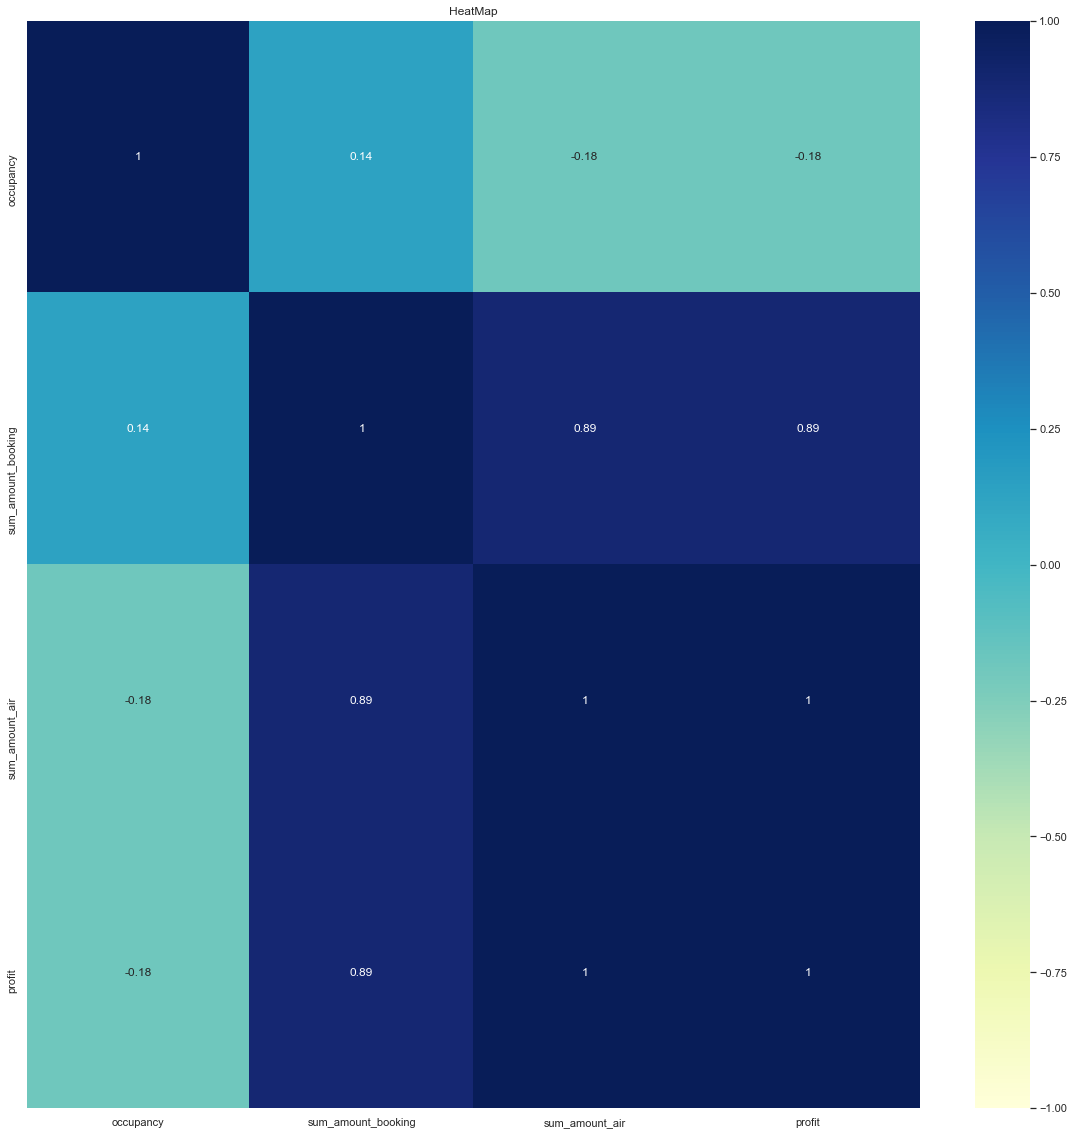

In [36]:
#Тепловая карта - проверим
get_Heatmap(df,cols)

## 4.2) Box-Plot

### В дальнейшем:
##### PG0252 - рейс Анапа-Москва на Boeing 737-300;
##### PG0480 - рейс Анапа-Белгород на SuperJet.

### 4.2.1) month

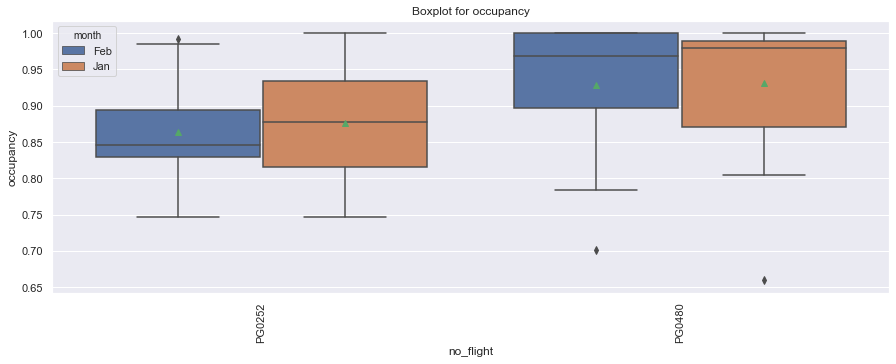

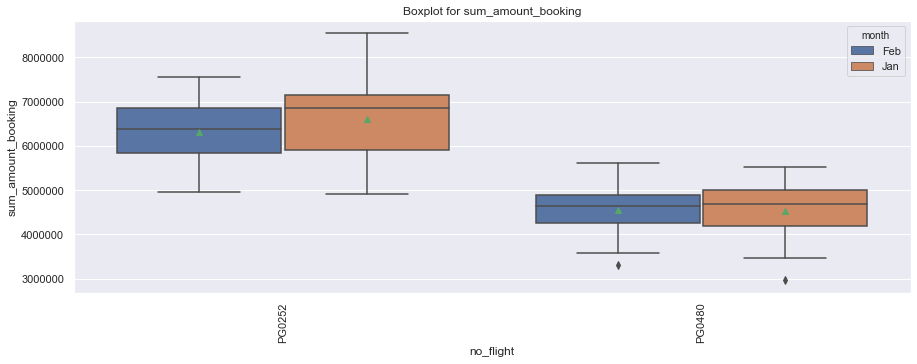

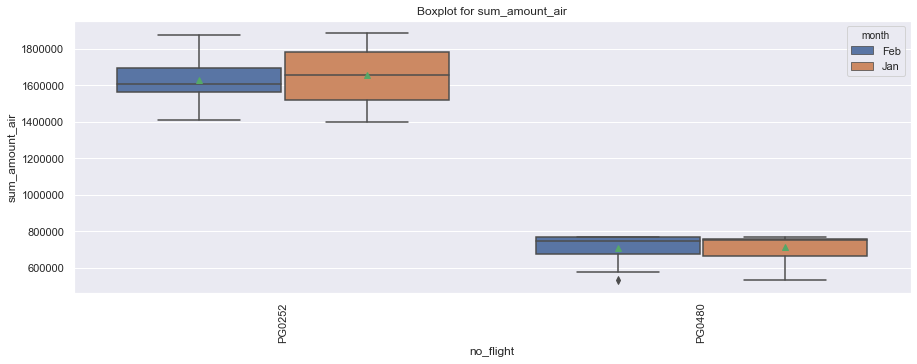

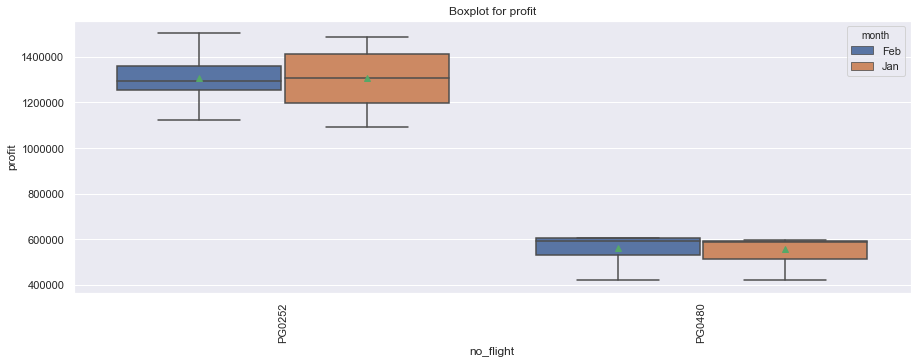

In [37]:
#Выводим Box-Plot
for col in cols:
    get_BoxPlot("no_flight",col,df,hue='month')

## 1. Box-Plot for *occupancy*:
#### а) Распределение для Белгорода сильно скошено влево, что свидетельствует о том, что заполняемость у рейса в Белгород выше. Среднее значение также выше, чем у рейса в Москву.
#### б) По месяцам различается незначительно.
## 2. Box-Plot for *sum_amount_booking*:
#### а) Сумма бронирований для рейсов в Москву выше.
#### б) Для Января бронирования по рейсам в Москву имеют более высокую цену.
## 3. Box-Plot for *sum_amount_air*:
#### а) Сумма за билеты для рейсов в Москву выше в среднем на 1 000 000 рублей. Цены для Boeing распределены нормально, а для SU9 сильно смещены влево.
#### б) По месяцам различается незначительно.
## 4. Box-Plot for *profit*:
#### а) Прибыль для рейсов в Москву выше в среднем на 700 000 рублей. Прибыль для Boeing распределена нормально, а для SU9 сильно смещена влево.
#### б) По месяцам различается незначительно.

### 4.2.1) day of week

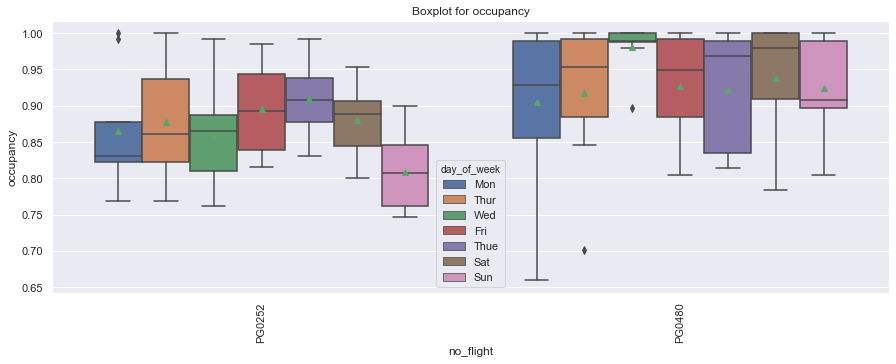

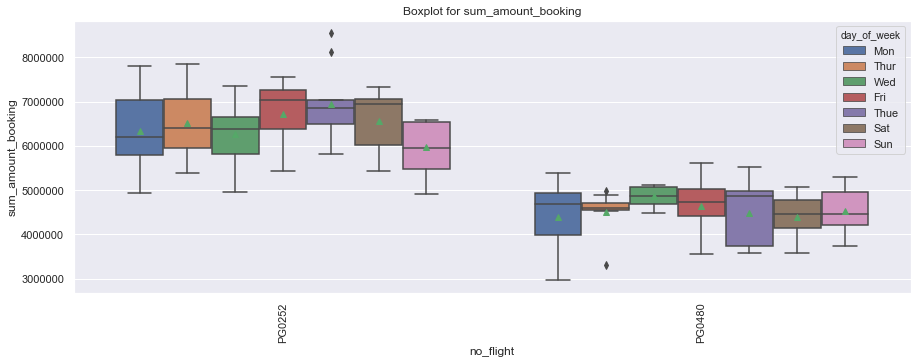

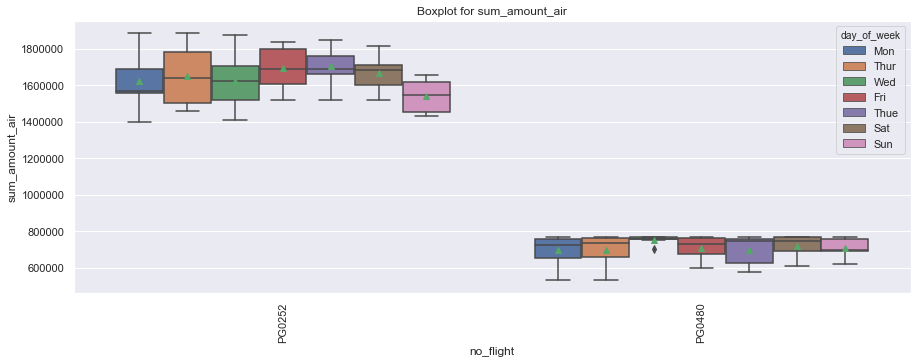

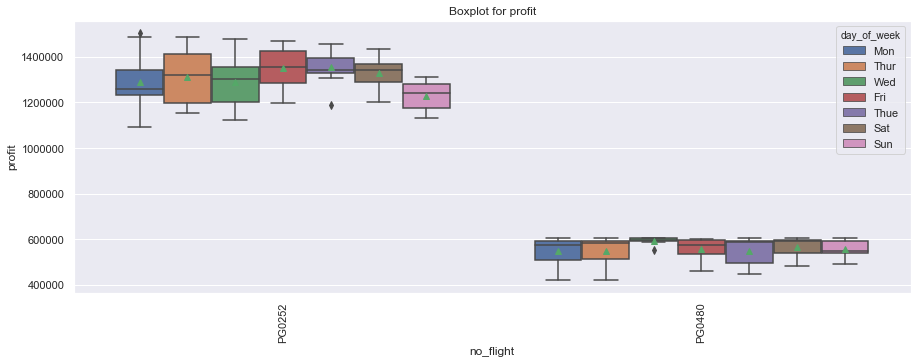

In [38]:
#Выводим Box-Plot
for col in cols:
    get_BoxPlot("no_flight",col,df,hue='day_of_week')

## 1. Box-Plot for *occupancy*:
#### а) Для рейса в Москву. Пиковые дни во вторник и пятницу. Ближе в выходным и в понедельник наблюдается спад заполняемости. В понедельник есть небольшое количество выбросов (возможные экстренные рейсы).
#### б) Для рейса в Белгород. Заполняемость средняя выше, чем у рейса в Москву. Все распределения смещены влево (стремятся к 1). В среду наблюдаются пиковые значения при минимальном количестве рейсов (мало рейсов -> высокая нагруженность рейсов).
## 2. Box-Plot for *sum_amount_booking*:
#### а) Для рейса в Москву. Ближе к выходным сумма букинга идет на спад из-за снижения количества пассажиров. Вторник имеет самые высокие значения, за исключением выбросов в пятницу.
#### б) Для рейса в Белгород. Букинг для пассажиров в Белгород более дешевый из-за того, что Boeing-737-300 имеет более высокое количество пассажирских мест.
## 3. Box-Plot for *sum_amount_air*:
#### а) Аналогично распределению суммы за букинг: чем выше, количество пассажиров, тем выше общая сумма. При этом на данном графике видно, что средняя стоимость билетов в Белгород меньше билетов в Москву (отношение средних сумм не равно отношению числу возможных пассажиров).
## 4. Box-Plot for *profit*:
#### а) Аналогично распределению суммы за букинг и авиабилеты: чем выше, количество пассажиров, тем выше общая сумма и тем самым общая прибыль. Прибыль для рейса в Москву в среднем на 700 000 рублей выше, чем для рейса в Белгород.

## 4.3) LinePlot

### 4.3.1) date dep

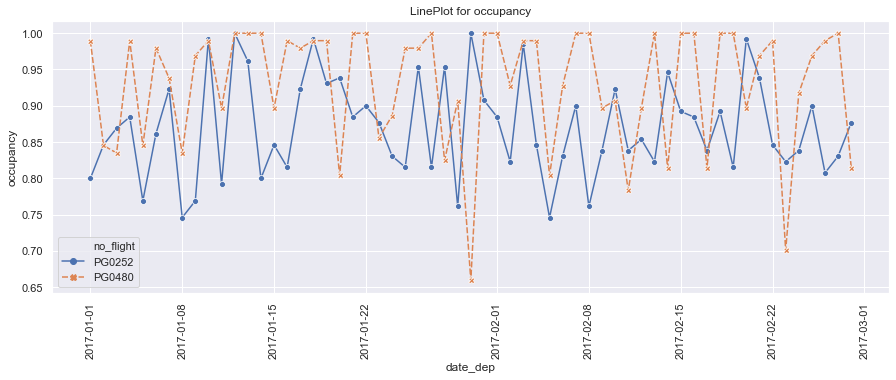

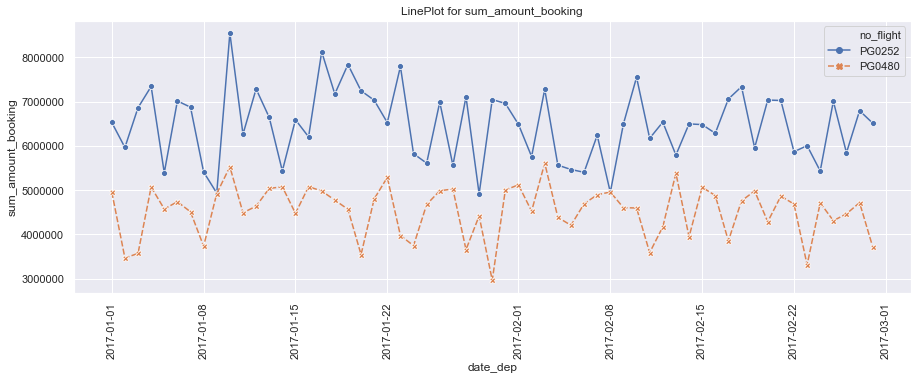

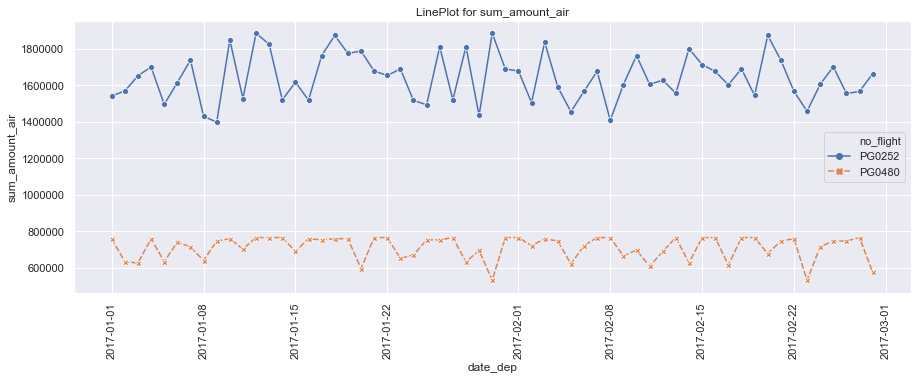

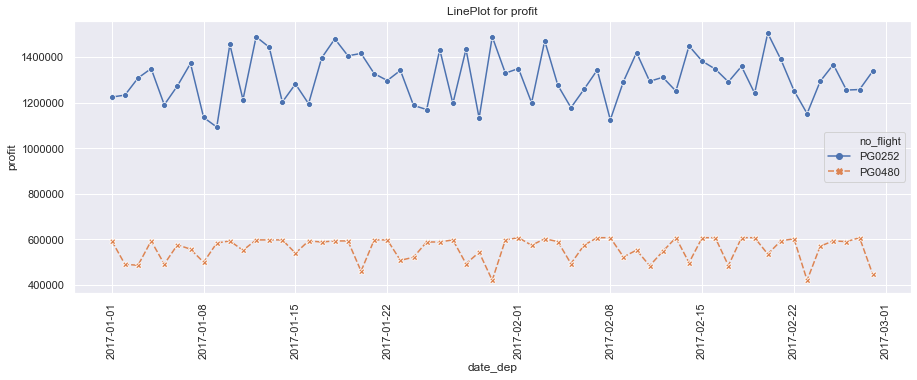

In [39]:
#Выводим LinePlot
for col in cols:
    get_LinePlot('date_dep',col,df,'no_flight')

## 1. Box-Plot for *occupancy*:
#### а) По дням распределено неравномерно, но есть общая закономерность - стабильные колебания вокруг некоего среднего.
#### б) В начале января наблюдается спад (из-за новогодних праздников).
#### в) Видны участки резкого спада заполянемости рейсов в конце января и на 23 февраля. Последнее объясняется праздником.
## 2. Box-Plot for *sum_amount_booking*, *sum_amount_air*, *profit*:
#### Аналогичная картина предыдущим выводам.

### 4.3.2) day of week

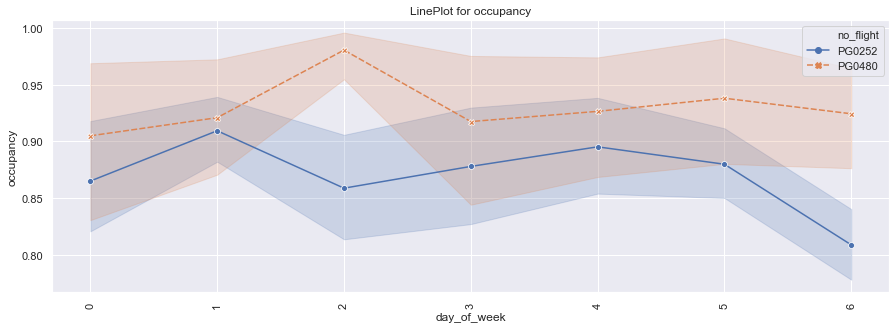

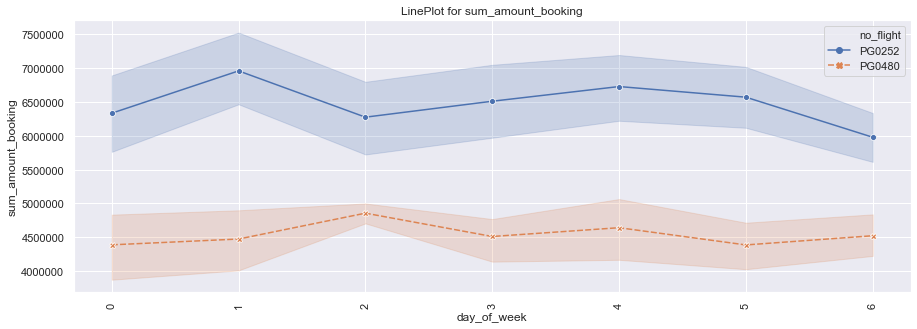

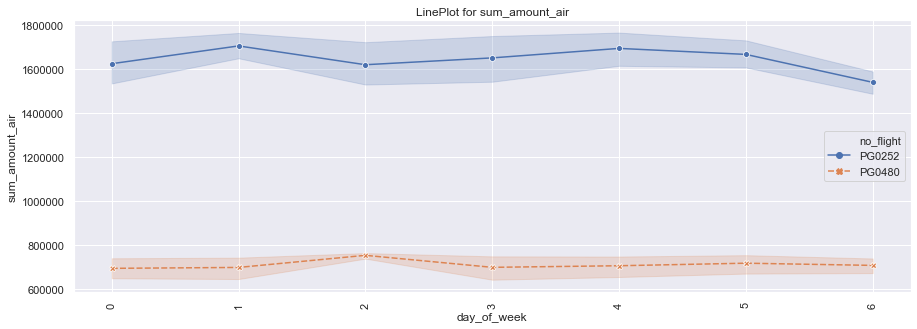

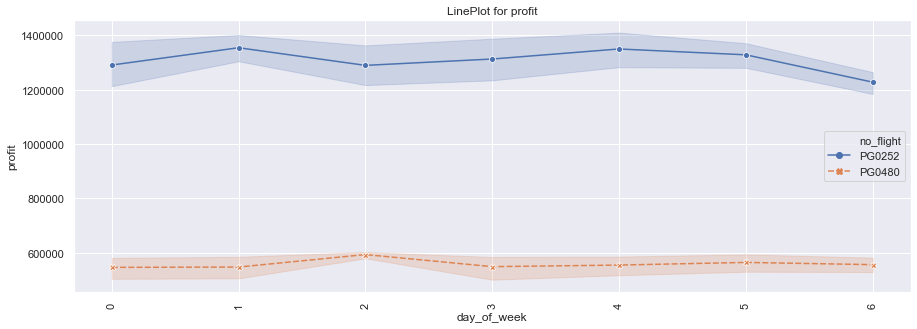

In [40]:
#Замена значений
dict_day = {'Mon':0, 'Thue':1, 'Wed':2, 'Thur':3, 'Fri':4, 'Sat':5, 'Sun':6}
df['month'] = df['month'].replace(dict_month)
df['day_of_week'] = df['day_of_week'].replace(dict_day)
#Выводим LinePlot
for col in cols:
    get_LinePlot('day_of_week',col,df,'no_flight')

## Выводы аналогичны Box-Plot для day of week.

## 4.4) PairPlot

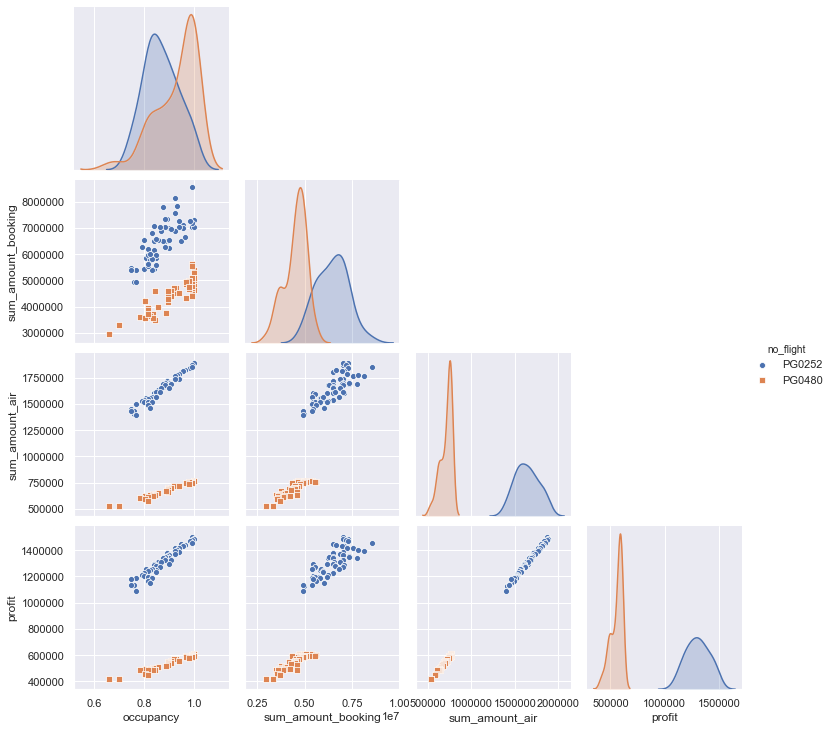

In [41]:
sns.pairplot(df[list(cols) + ['no_flight']], hue='no_flight', markers=['o', 's'], corner=True)

#### 1) Видно четкое разделение двух номеров рейсов (или город прибытия, или самолета и так далее). Рейс в Москву имеет большее число пассажиров, как следствие большая сумма букинга. Так как средняя сумма билета выше для рейса в Москву, то это еще больше увеличивает разрыв в чистой прибыли между рейсами в Москву и Белгород.
#### 2) Заполняемость для рейса в Белгород выше (зависимость смещена влево).
#### 3) Суммы прибылей и чистая прибыль имеют для рейса в Москву распределение похожее на нормальное, а для рейса в Белгород - нормальное со смещением влево. При этом последнее имеет стандартное отклонение ниже, чем для рейса в Москву.

## 4.5) Какие рейсы отменить?

***Для ответа на данный вопрос посмотрим на распределение признака Profit - чистая прибыль, что мы посчитали.***

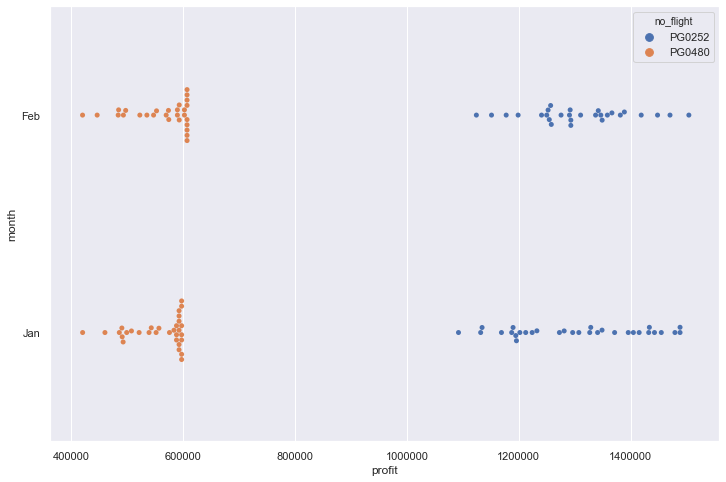

In [42]:
plt.rcParams['figure.figsize'] = (12,8)
sns.swarmplot(data=df, x='profit', y='month', hue='no_flight')

***Видно, что все значения положительные, а значит чистая прибыль есть. Но ответим на два вопроса: правильно ли мы учли все возможные траты и можно ли сократить общее число рейсов (и соответственно траты), при этом сохранить или увеличить чистую прибыль.***

***Для ответа на первый вопрос: можно применить дополнительную поправку - вычесть некую сумму потерь. При увеличении данной суммы - количество рейсов с отрицательным profit будет увеличиваться. Можно также сказать, что для рейсов в Москву (Boeing) эти траты будут выше, что позволит сократить наблюдаемую разницу между profit рейса в Москву и рейса в Белгород.***

***Поэтому попытаемся мысленно учесть данную поправку и определить те рейсы в каждой из групп, от которых можно было бы избавиться.***

***Смотря на график выше отметим для каждой  группы возможные рейсы на удаление.***

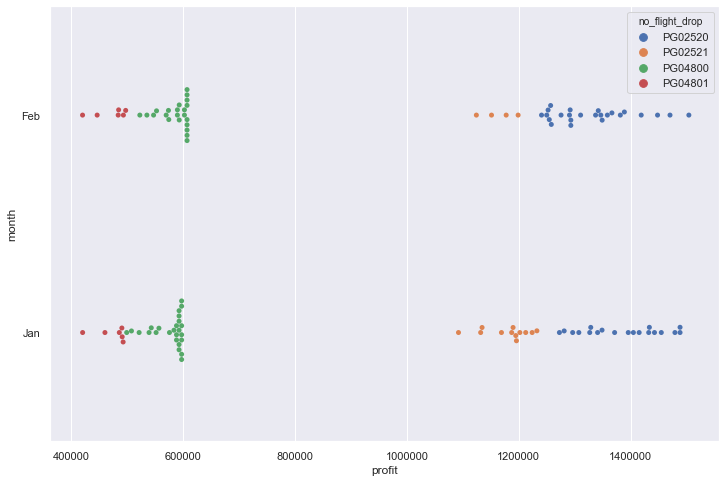

In [43]:
#Метка на удаление
df['drop'] = 0
#Отметим
df.loc[(df['profit'] < 495000) & (df['no_flight'] == 'PG0480') & (df['month'] == 'Jan'),'drop'] = 1
df.loc[(df['profit'] < 500000) & (df['no_flight'] == 'PG0480') & (df['month'] == 'Feb'),'drop'] = 1
df.loc[(df['profit'] < 1250000) & (df['no_flight'] == 'PG0252') & (df['month'] == 'Jan'),'drop'] = 1
df.loc[(df['profit'] < 1200000) & (df['no_flight'] == 'PG0252') & (df['month'] == 'Feb'),'drop'] = 1
#Дополнительный признак для отображения
df['no_flight_drop'] = df[['no_flight','drop']].apply(lambda x: str(x[0]) + str(x[1]), axis=1)
#Построим график обновленный
plt.rcParams['figure.figsize'] = (12,8)
sns.swarmplot(data=df, x='profit', y='month', hue='no_flight_drop')

***Отметили часть рейсов, чья прибыль минимальная среди групп. Посмотрим на распределение этих отмеченных данных по дням недели.***

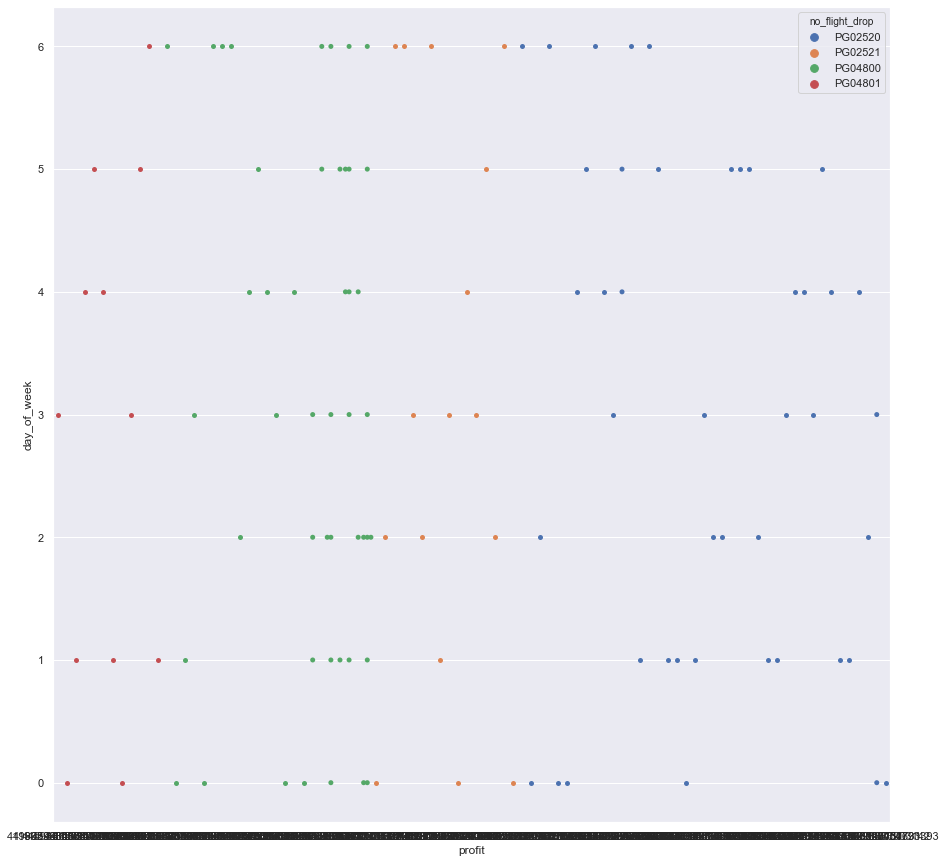

In [44]:
plt.rcParams['figure.figsize'] = (15,15)
sns.swarmplot(data=df, x="profit", y="day_of_week", hue="no_flight_drop")

In [45]:
#Распределение пропусков по дням
df.groupby(['no_flight','day_of_week'])['drop'].agg(lambda x: list(x).count(1))

no_flight  day_of_week
PG0252     0              3
           1              1
           2              3
           3              3
           4              1
           5              1
           6              4
PG0480     0              2
           1              3
           2              0
           3              2
           4              2
           5              2
           6              1
Name: drop, dtype: int64

In [46]:
#Распределение пропусков по месяцам
df.groupby(['no_flight','month'])['drop'].agg(lambda x: list(x).count(1))

no_flight  month
PG0252     Feb       4
           Jan      12
PG0480     Feb       6
           Jan       6
Name: drop, dtype: int64

***Получается, что удаляемые рейсы примерно равномерно (среднее - 2) распределились по дням недели (большое число рейсов в Москву выпали на выходыне дни, что объясняется низкой заполняемостью в эти дни, как было видно с Box-Plot). Вывод из этого можно сделать следующий: если в каждый день недели убрать по несколько рейсов, то заполняемость остальных рейсов в этот день вырастет, так как предложение упадет, а спрос останется примерно на том же уровне.***

In [47]:
#Список удаляемых рейсов
list(df[df['drop'] == 1]['id_flight'].values)

[136458,
 136420,
 136486,
 136366,
 136185,
 136485,
 136282,
 136345,
 136202,
 136383,
 136204,
 136360,
 136250,
 136178,
 136122,
 136464,
 136888,
 136645,
 136823,
 136936,
 136678,
 136937,
 136620,
 136922,
 136887,
 136844,
 136807,
 136642]

In [48]:
#Средняя и медианная прибыльность рейсов по дням
df.groupby(['no_flight','day_of_week'])['profit'].agg(['mean','median'])

mean        median
no_flight day_of_week                            
PG0252    0            1.290968e+06  1.257048e+06
          1            1.354618e+06  1.342269e+06
          2            1.289705e+06  1.300754e+06
          3            1.313113e+06  1.319391e+06
          4            1.350059e+06  1.354285e+06
          5            1.328536e+06  1.342761e+06
          6            1.227970e+06  1.240777e+06
PG0480    0            5.462080e+05  5.741058e+05
          1            5.473983e+05  5.879185e+05
          2            5.933345e+05  5.972918e+05
          3            5.488327e+05  5.807122e+05
          4            5.546777e+05  5.723794e+05
          5            5.644515e+05  5.911339e+05
          6            5.562203e+05  5.469090e+05

In [49]:
#Средняя и медианная прибыльность рейсов по месяцам
df.groupby(['no_flight','month'])['profit'].agg(['mean','median'])

mean        median
no_flight month                            
PG0252    Feb    1.308382e+06  1.293184e+06
          Jan    1.305762e+06  1.307504e+06
PG0480    Feb    5.616677e+05  5.894996e+05
          Jan    5.552296e+05  5.879185e+05

***Для рейса в Москву она выше. По месяцам сильно не изменяется. Пиковые значения прибыли во вторник и пятницу для рейса в Белгород, и во среду и субботу в Москву.***